<a href="https://colab.research.google.com/github/ashishgeddam2002/simple-linear-regression-assignment-/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1)

   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10
       Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000
Correlation: 0.83
0.3523900822831107
0.047115474210530174
Model 1 R-squared: 0.6822714748417231 RMSE: 2.7916503270617654
Model 2 R-squared: 0.7109478980584187 RMSE: 14.795516941016684
Model 3 R-squared: 0.6934396274520247 RMSE: 2.7421482037801215
Model 4 R-squared: 0.7648666342953729 RMSE: 14.793141570730088


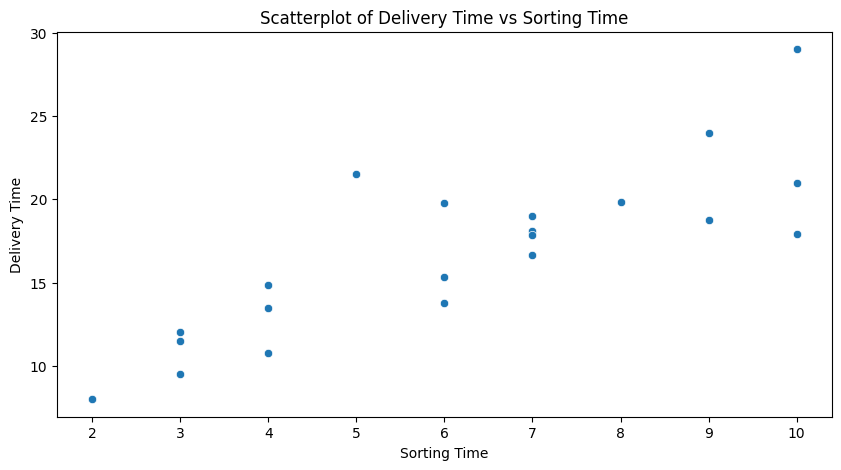

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

# Load the dataset
dt = pd.read_csv('delivery_time.csv')

# Perform initial data exploration
print(dt.head())
print(dt.describe())

# Visualize the relationship between delivery time and sorting time
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Sorting Time', y='Delivery Time', data=dt)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Scatterplot of Delivery Time vs Sorting Time')

# Calculate the correlation between delivery time and sorting time
corr = dt['Delivery Time'].corr(dt['Sorting Time'])
print(f'Correlation: {corr:.2f}')

# Perform necessary transformations
# Check for skewness in the variables
print(dt['Delivery Time'].skew())
print(dt['Sorting Time'].skew())

# Perform log transformation on delivery time
dt['Delivery Time Log'] = np.log(dt['Delivery Time'])

# Perform square transformation on sorting time
dt['Sorting Time Sq'] = dt['Sorting Time']**2


# Model 1: Simple linear regression
model1 = smf.ols('Q("Delivery Time") ~ Q("Sorting Time")', data=dt).fit()

# Model 2: Simple linear regression with logarithmic transformation on the dependent variable
model2 = smf.ols('np.log(Q("Delivery Time")) ~ Q("Sorting Time")', data=dt).fit()

# Model 3: Quadratic regression
model3 = smf.ols('Q("Delivery Time") ~ Q("Sorting Time") + I(Q("Sorting Time")**2)', data=dt).fit()

# Model 4: Quadratic regression with logarithmic transformation on the dependent variable
model4 = smf.ols('np.log(Q("Delivery Time")) ~ Q("Sorting Time") + I(Q("Sorting Time")**2)', data=dt).fit()

# Evaluate the models
# Calculate R-squared
r_squared1 = model1.rsquared
r_squared2 = model2.rsquared
r_squared3 = model3.rsquared
r_squared4 = model4.rsquared

# Calculate adjusted R-squared
adj_r_squared1 = 1 - (1-r_squared1)*(dt.shape[0]-1)/(dt.shape[0]-2-1)
adj_r_squared2 = 1 - (1-r_squared2)*(dt.shape[0]-1)/(dt.shape[0]-2-1)
adj_r_squared3 = 1 - (1-r_squared3)*(dt.shape[0]-1)/(dt.shape[0]-2-1)
adj_r_squared4 = 1 - (1-r_squared4)*(dt.shape[0]-1)/(dt.shape[0]-2-1)

# Calculate RMSE
y_pred1 = model1.predict(dt['Sorting Time'])
y_pred2 = model2.predict(dt[['Sorting Time', 'Delivery Time Log']])
y_pred3 = model3.predict(dt[['Sorting Time', 'Sorting Time Sq']])
y_pred4 = model4.predict(dt[['Sorting Time', 'Sorting Time Sq', 'Delivery Time Log']])

rmse1 = np.sqrt(mean_squared_error(dt['Delivery Time'], y_pred1))
rmse2 = np.sqrt(mean_squared_error(dt['Delivery Time'], y_pred2))
rmse3 = np.sqrt(mean_squared_error(dt['Delivery Time'], y_pred3))
rmse4 = np.sqrt(mean_squared_error(dt['Delivery Time'], y_pred4))


print("Model 1 R-squared:", r_squared1, "RMSE:", rmse1)
print("Model 2 R-squared:", r_squared2, "RMSE:", rmse2)
print("Model 3 R-squared:", r_squared3, "RMSE:", rmse3)
print("Model 4 R-squared:", r_squared4, "RMSE:", rmse4)



In [ ]:
#the 4 model

Q2)

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000
Correlation: 0.98
0.37956024064804106
0.35411967922959153
Model 1 R-squared: 0.9569566641435086 RMSE: 0.5788774181748744
Model 2 R-squared: 0.853888882875697 RMSE: 0.864953676361536
Model 3 R-squared: 0.9575102146552049 RMSE: 0.5751431025678693
Model 4 R-squared: 0.9073830571480186 RMSE: 0.7214302704574553


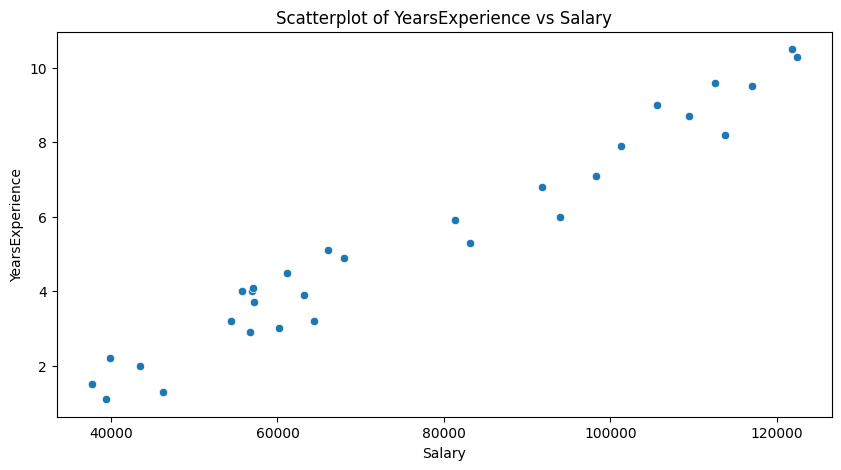

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

# Load the dataset
dt = pd.read_csv('Salary_Data.csv')

# Perform initial data exploration
print(dt.head())
print(dt.describe())

# Visualize the relationship between YearsExperience and Salary
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Salary', y='YearsExperience', data=dt)
plt.xlabel('Salary')
plt.ylabel('YearsExperience')
plt.title('Scatterplot of YearsExperience vs Salary')

# Calculate the correlation between YearsExperience and Salary
corr = dt['YearsExperience'].corr(dt['Salary'])
print(f'Correlation: {corr:.2f}')

# Perform necessary transformations
# Check for skewness in the variables
print(dt['YearsExperience'].skew())
print(dt['Salary'].skew())

# Perform log transformation on YearsExperience
dt['YearsExperience_Log'] = np.log(dt['YearsExperience'])

# Perform square transformation on Salary
dt['Salary_Sq'] = dt['Salary']**2

# Model 1: Simple linear regression
model1 = smf.ols('YearsExperience ~ Salary', data=dt).fit()

# Model 2: Simple linear regression with logarithmic transformation on the dependent variable
model2 = smf.ols('YearsExperience_Log ~ Salary', data=dt).fit()

# Model 3: Quadratic regression
model3 = smf.ols('YearsExperience ~ Salary + I(Salary**2)', data=dt).fit()

# Model 4: Quadratic regression with logarithmic transformation on the dependent variable
model4 = smf.ols('YearsExperience_Log ~ Salary + I(Salary**2)', data=dt).fit()

# Evaluate the models
# Calculate R-squared
r_squared1 = model1.rsquared
r_squared2 = model2.rsquared
r_squared3 = model3.rsquared
r_squared4 = model4.rsquared

# Calculate adjusted R-squared
adj_r_squared1 = model1.rsquared_adj
adj_r_squared2 = model2.rsquared_adj
adj_r_squared3 = model3.rsquared_adj
adj_r_squared4 = model4.rsquared_adj

# Calculate RMSE
y_pred1 = model1.predict(dt['Salary'])
y_pred2 = np.exp(model2.predict(dt['Salary']))
y_pred3 = model3.predict(dt[['Salary', 'Salary_Sq']])
y_pred4 = np.exp(model4.predict(dt[['Salary', 'Salary_Sq']]))

rmse1 = np.sqrt(mean_squared_error(dt['YearsExperience'], y_pred1))
rmse2 = np.sqrt(mean_squared_error(dt['YearsExperience'], y_pred2))
rmse3 = np.sqrt(mean_squared_error(dt['YearsExperience'], y_pred3))
rmse4 = np.sqrt(mean_squared_error(dt['YearsExperience'], y_pred4))

print("Model 1 R-squared:", r_squared1, "RMSE:", rmse1)
print("Model 2 R-squared:", r_squared2, "RMSE:", rmse2)
print("Model 3 R-squared:", r_squared3, "RMSE:", rmse3)
print("Model 4 R-squared:", r_squared4, "RMSE:", rmse4)


In [18]:
#model 3
